# 연습문제 
 - 04_3.calorie.csv
 - 칼로리 1에 대해서 양측검정을 하고 귀무가설 채택인지 기각인지 서술하시오.
 - 기준값 500
 - 칼로리 1에 대해서 정규성 검정, 이상치 제거 -> 양측 검정

### 설정

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
!apt-get install -y fonts-nanum
!fc-chache -fv
!rm ~/.cache/matplotlib -rf

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'fc-chache'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [3]:
sns.set_theme(style="darkgrid")
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [26]:
cal_df = pd.read_csv('./data/04_3.calorie.csv', encoding = 'cp949')
cal_df.head()

,칼로리1,칼로리2,칼로리3
0,509,511,512
1,491,493,494
2,501,503,504
3,502,504,505
4,498,500,501


In [5]:
cal_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
칼로리1,41.0,501.610,16.259,490.0,497.0,500.0,502.0,600.0
칼로리2,41.0,503.561,15.956,492.0,499.0,502.0,504.0,600.0
칼로리3,41.0,504.537,15.805,493.0,500.0,503.0,505.0,600.0


## 1. 칼로리1 양측검정

In [8]:
# two-side 양측 검정
pg.ttest(cal_df['칼로리1'], 500, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.634,40,two-sided,0.53,"[496.48, 506.74]",0.099,0.204,0.095


## 2. 정규성 검정

In [27]:
pg.normality(cal_df['칼로리1']).round(3)

,W,pval,normal
칼로리1,0.354,0.0,False


## 2.2 이상치 제거

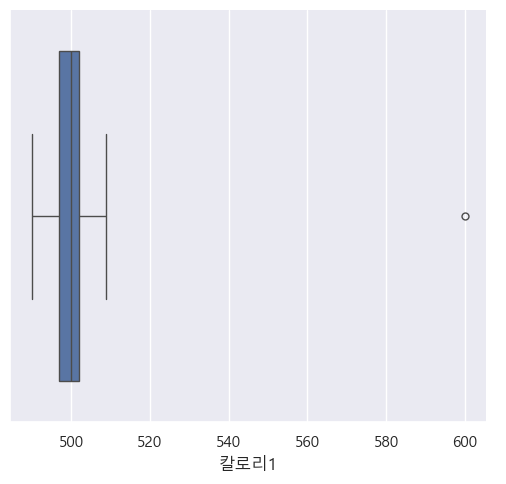

In [19]:
sns.catplot(data = cal_df,
            x = '칼로리1',
            kind = 'box')

In [20]:
filter = (cal_df['칼로리1'] >= 580)
cal_df.loc[filter]

,칼로리1,칼로리2,칼로리3
40,600,600,600


In [28]:
cal_df.drop(cal_df[filter].index, inplace=True)

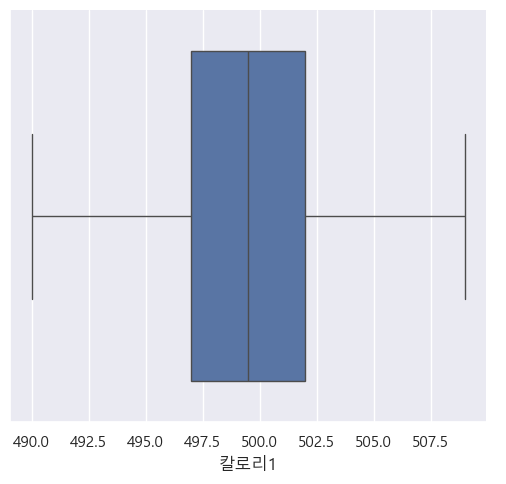

In [22]:
sns.catplot(data = cal_df,
            x = '칼로리1',
            kind = 'box')

## 2.3 다시 양측, 정규성 검정

In [23]:
# two-side 양측 검정
pg.ttest(cal_df['칼로리1'], 500, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.316,39,two-sided,0.196,"[497.84, 500.46]",0.208,0.379,0.25


In [29]:
# 정규성 검정
pg.normality(cal_df['칼로리1']).round(3)

,W,pval,normal
칼로리1,0.981,0.744,True


처음 데이터에서는 귀무가설 기각이었지만 이상치를 제거함으로 귀무가설 채택